In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [5]:
from ska_sim import diffuse, ps
from ska_sim import combine_map as cm

from ska_sim import plot_map as pm

import numpy as np

In [10]:
base_path = '/home/DATA/ycli/ska_challenge/2023/'

ps_path = base_path
ps_name = 'GLMv2_LoBES03Mar2022_combine.fits'

hi_path = '/home/DATA/shaoyue/data_challenge_900/'
hi_name = 'lightcones_brightness_xy600_z900_r20230200.h5'
hi_file = hi_path + hi_name
hi_key  = 'delta_T'

ps_output_path = base_path + 'sim_900_pointsource/'
flux_cut = 1.e5
pad = 0

fg_output_path = base_path + 'sim_900_diffuseFG/'
sck_params = {'A': 700.}

random_seed = 123456789
np.random.seed(random_seed)

c_output_path = base_path + 'sim_900_combined/'


for ii in range(1):
    
    ps.sim_ps_map(ps_path, ps_name, hi_file, hi_key, 
                  output_path=ps_output_path, 
                  flux_cut=flux_cut, shuffle_radec=ii, 
                  polyfit=True, pad=pad)
    
    
    diffuse.sim_diffuse_fg_map(hi_file, hi_key, sck_params=sck_params, 
                               output_path=fg_output_path, pad=pad, 
                               suffix='diffuse_fg%02d'%ii)
    
    ps_name = 'pointsource_%dmuJy_pad%d_%02d_polyfit.h5'%(flux_cut, pad, ii)
    ps_file = ps_output_path + ps_name
    ps_key  = 'ps_map'
    
    fg_name = 'sckdiffuse_fg%02d_pad%d.h5'%(ii, pad)
    fg_file = fg_output_path + fg_name
    fg_key  = 'fg_map'

    cm.stack_maps(hi_file, hi_key='delta_T', hi_unit='mK',
                  ps_file=ps_file, ps_key=ps_key, 
                  fg_file=fg_file, fg_key=fg_key, 
                  output_path=c_output_path, pad=pad,
                  suffix='imap%02d'%ii)

(900, 600, 600)


100%|██████████| 1392/1392 [00:00<00:00, 11896.87it/s]


There are 1392 sources
(900, 600, 600)
(900, 600, 600)
No mask
No unit
No mask
No mask


No mask
No unit


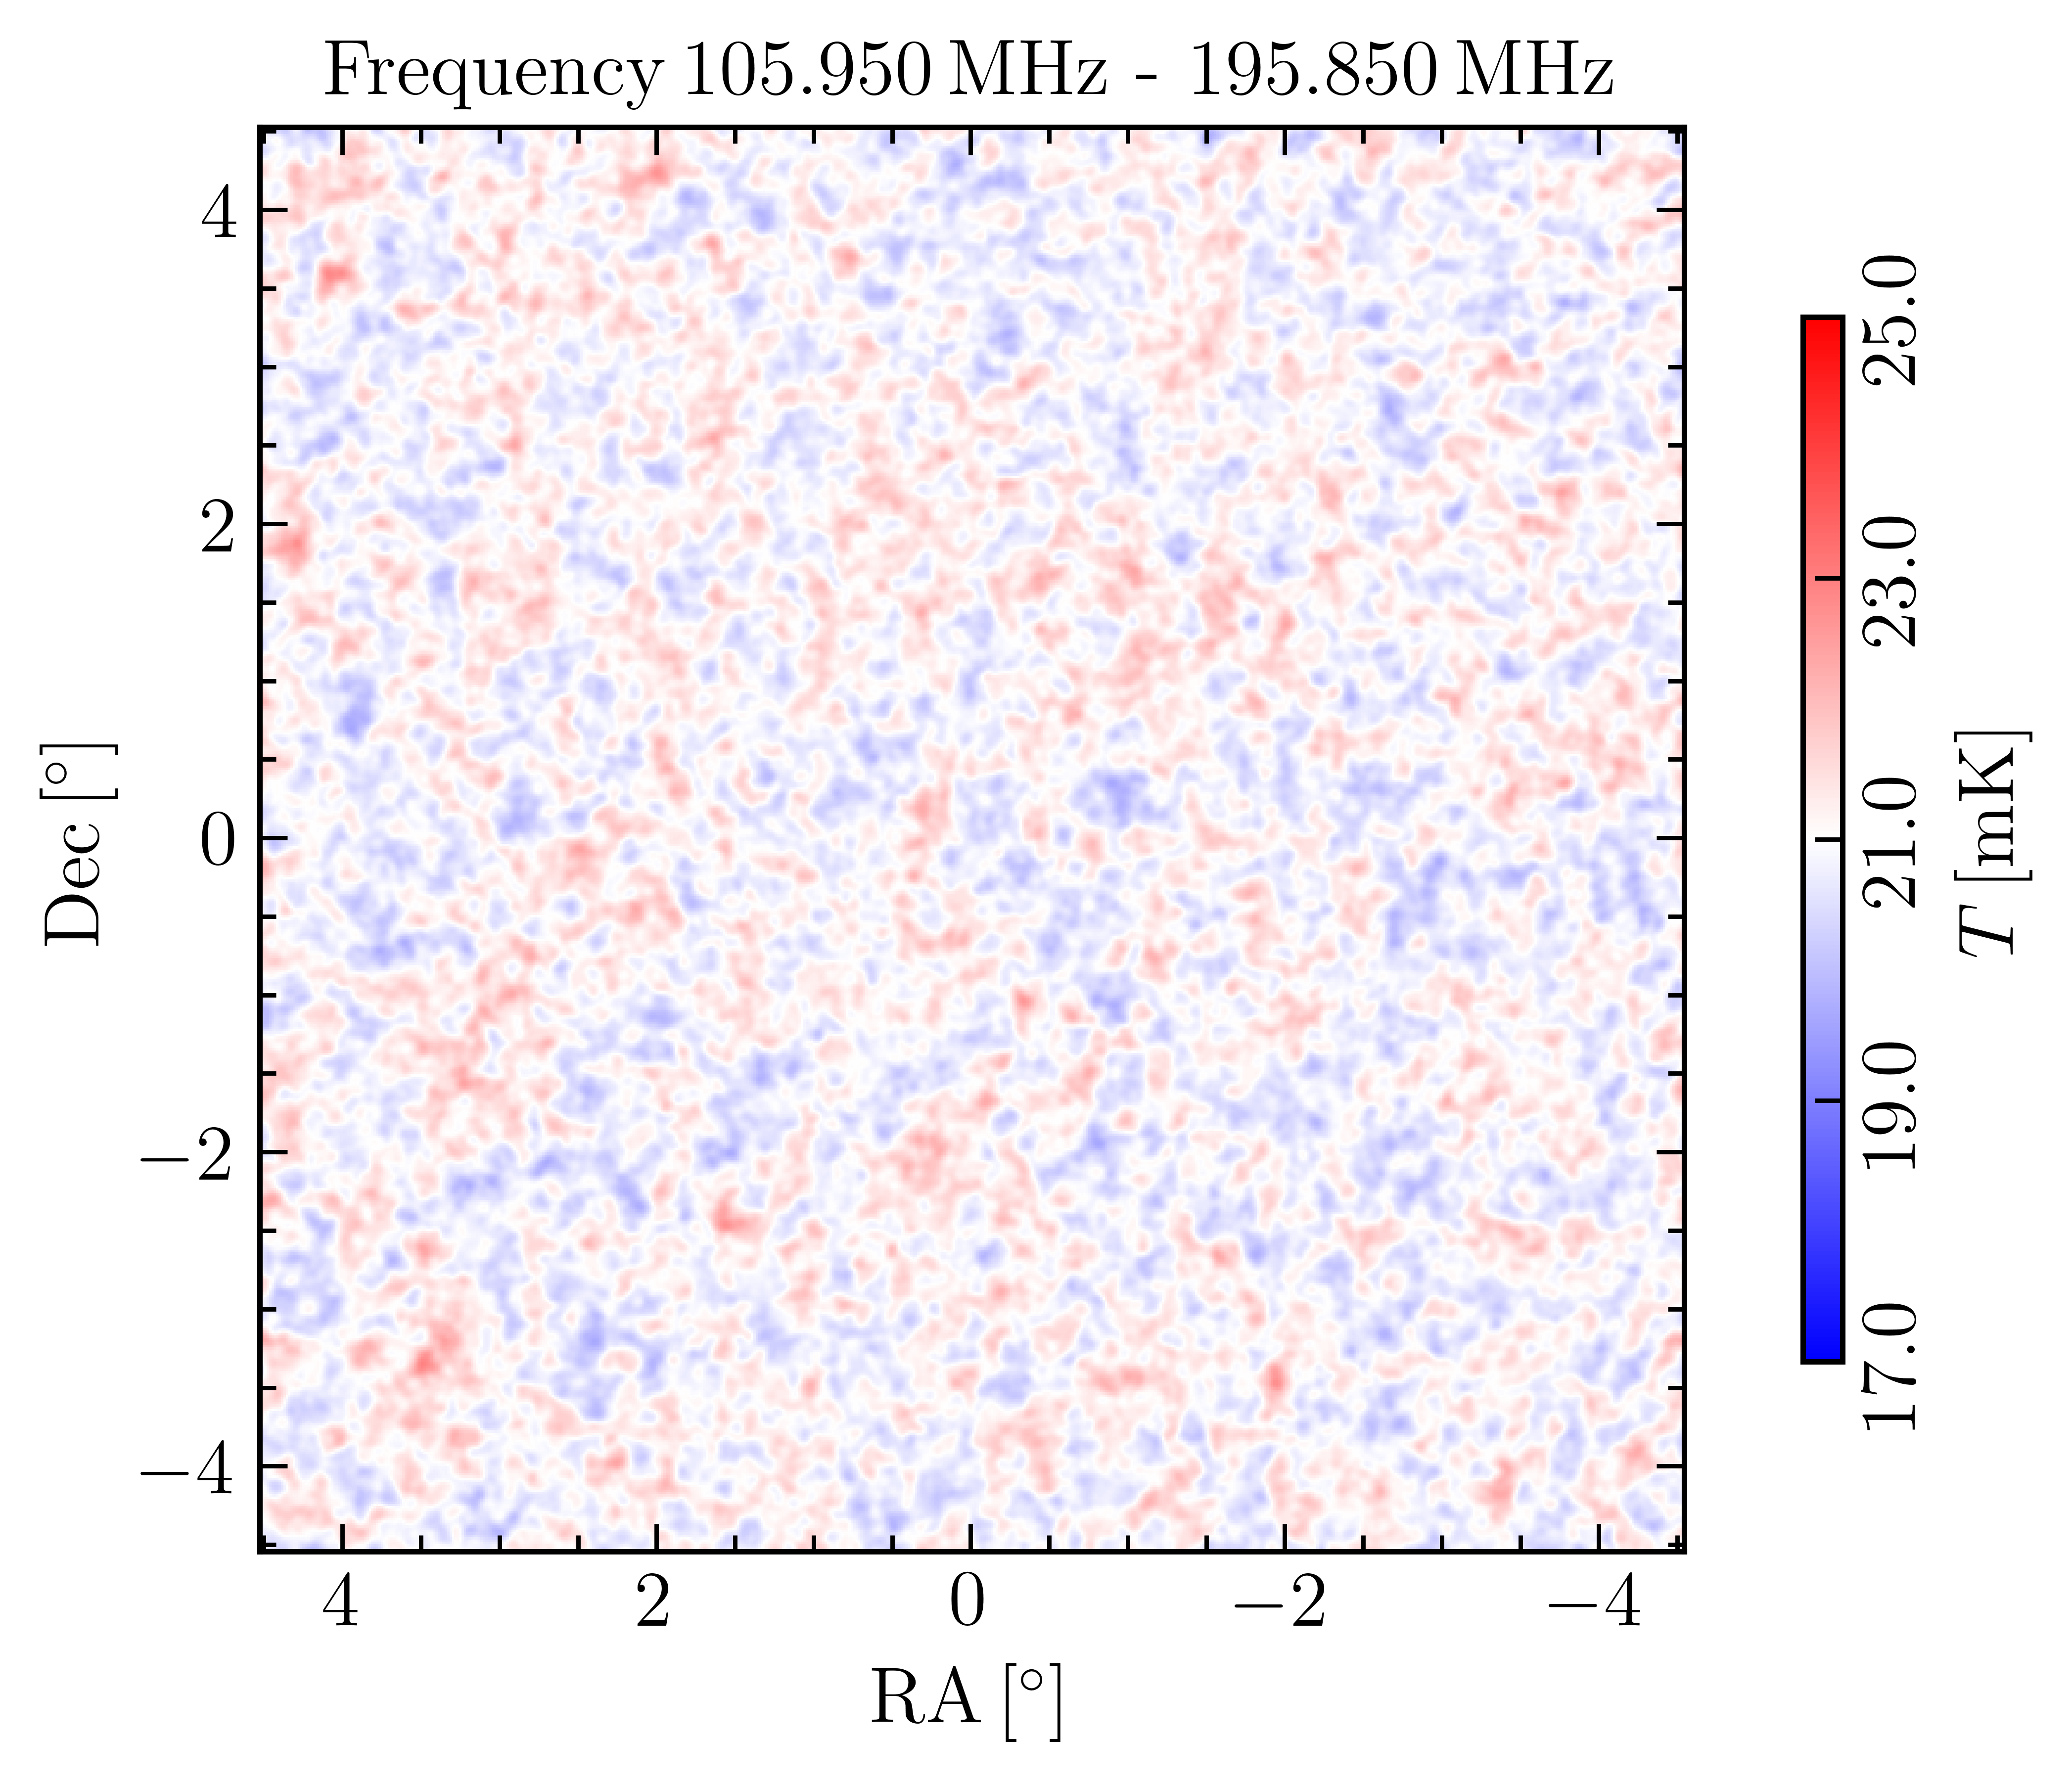

In [19]:
imap_path = '/home/DATA/shaoyue/data_challenge_900/'
imap_name = 'lightcones_brightness_xy600_z900_r20230200.h5'
pm.show_map(imap_path+imap_name, 'delta_T', indx=(slice(0, None), ), 
            figsize=(6, 4), sigma=10, unit='mK',smoothing_fwhm=0.055)

No mask


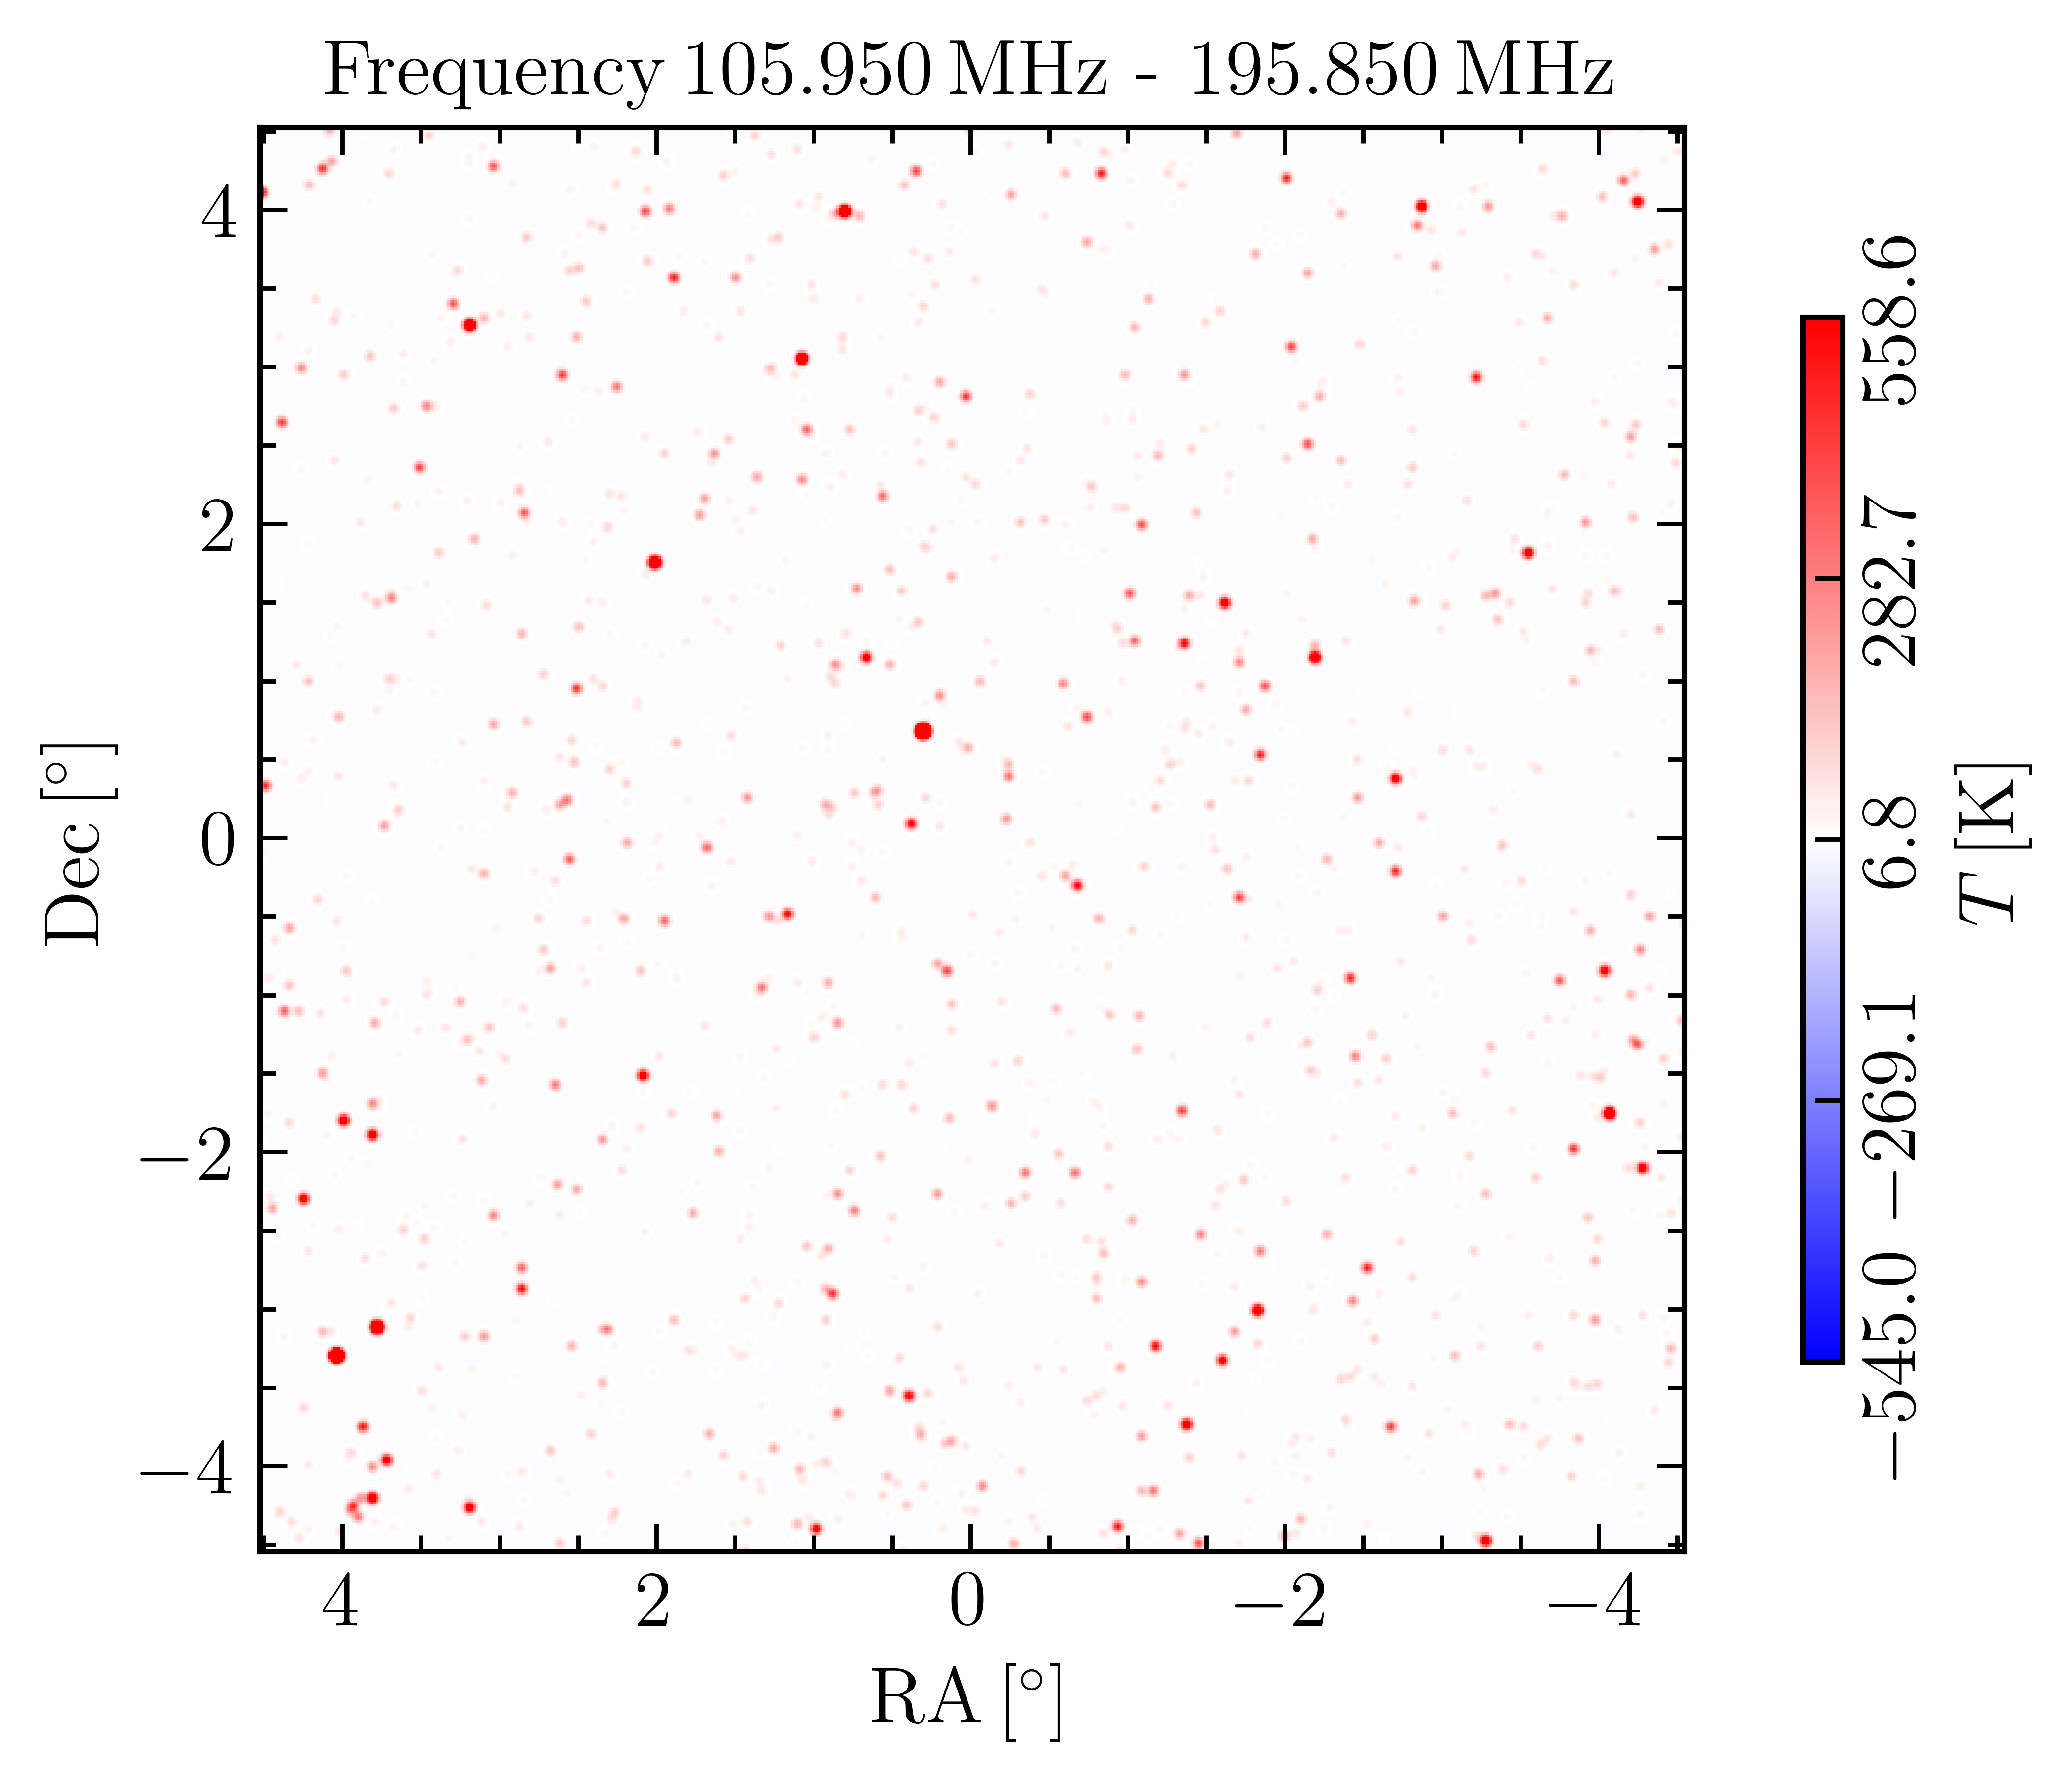

In [13]:
imap_path = '/home/DATA/ycli/ska_challenge/2023/sim_900_pointsource/'
imap_name = 'pointsource_100000muJy_pad0_00_polyfit.h5'
pm.show_map(imap_path+imap_name, 'ps_map', indx=(slice(0, None), ), 
            figsize=(6, 4), sigma=10, unit='K',smoothing_fwhm=0.055)

No mask


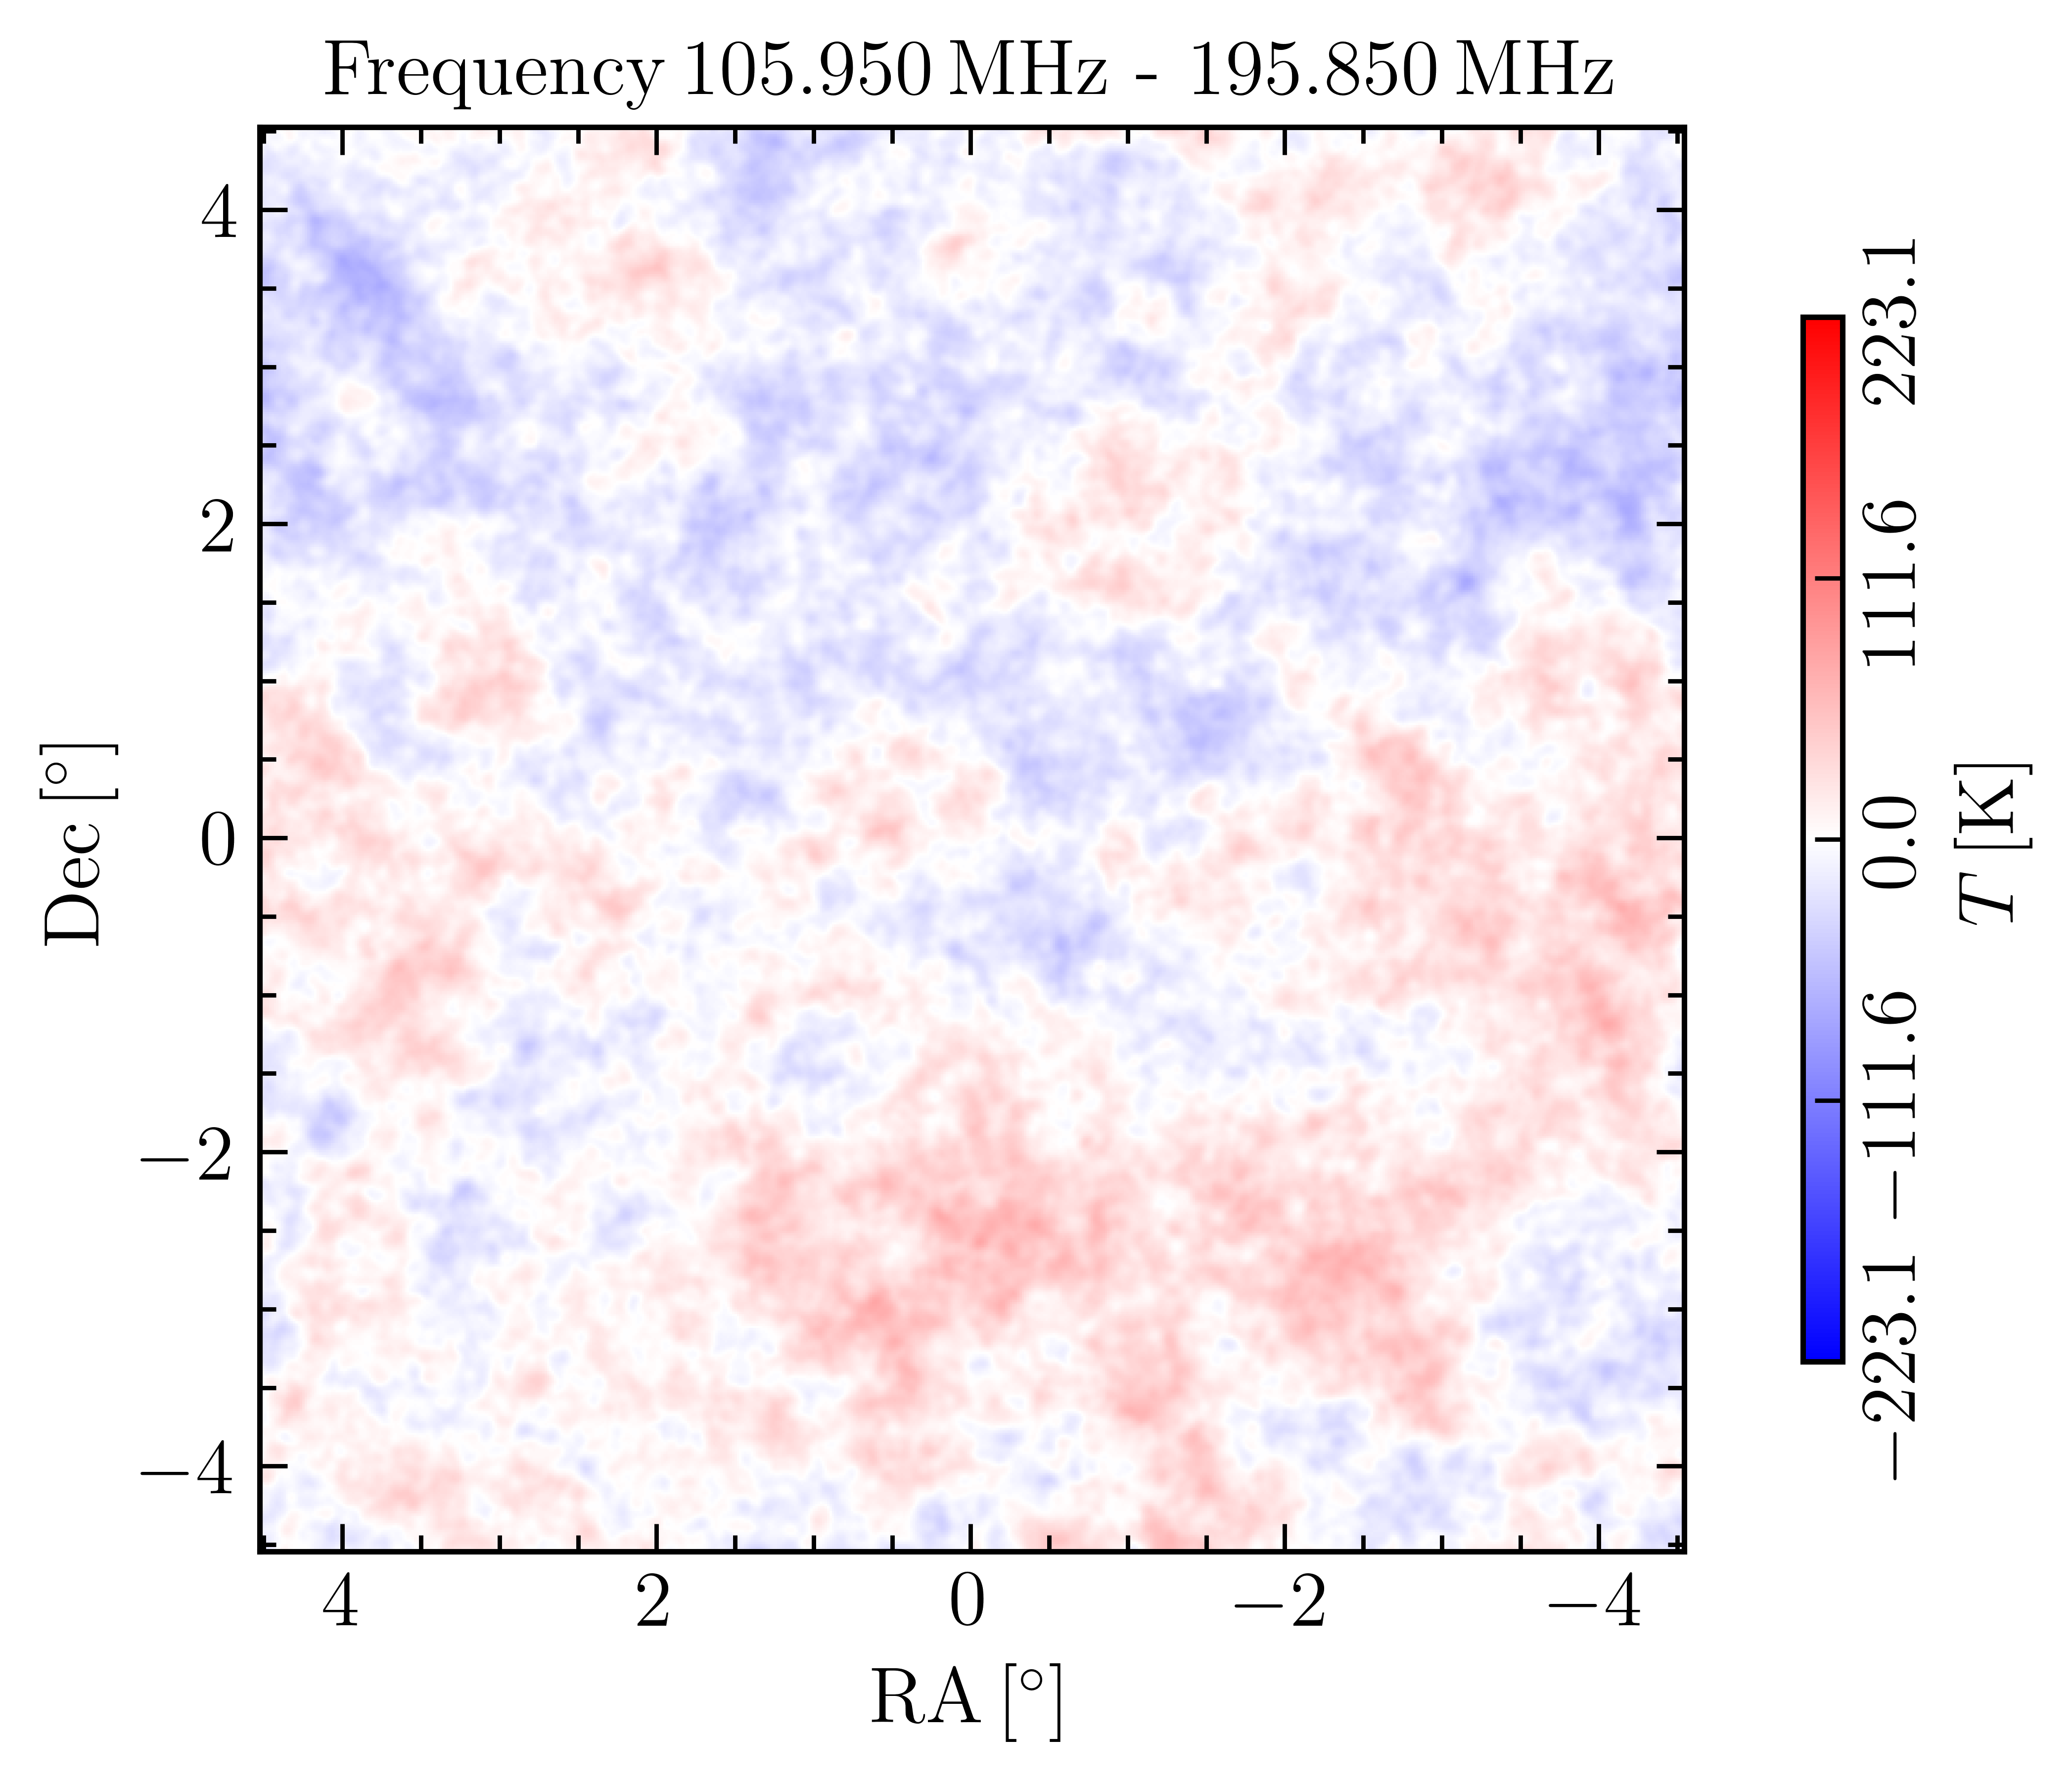

In [15]:
imap_path = '/home/DATA/ycli/ska_challenge/2023/sim_900_diffuseFG/'
imap_name = 'sckdiffuse_fg00_pad0.h5'
pm.show_map(imap_path+imap_name, 'fg_map', indx=(slice(0, None), ), 
            figsize=(6, 4), sigma=10, unit='K',smoothing_fwhm=0.055)

No mask


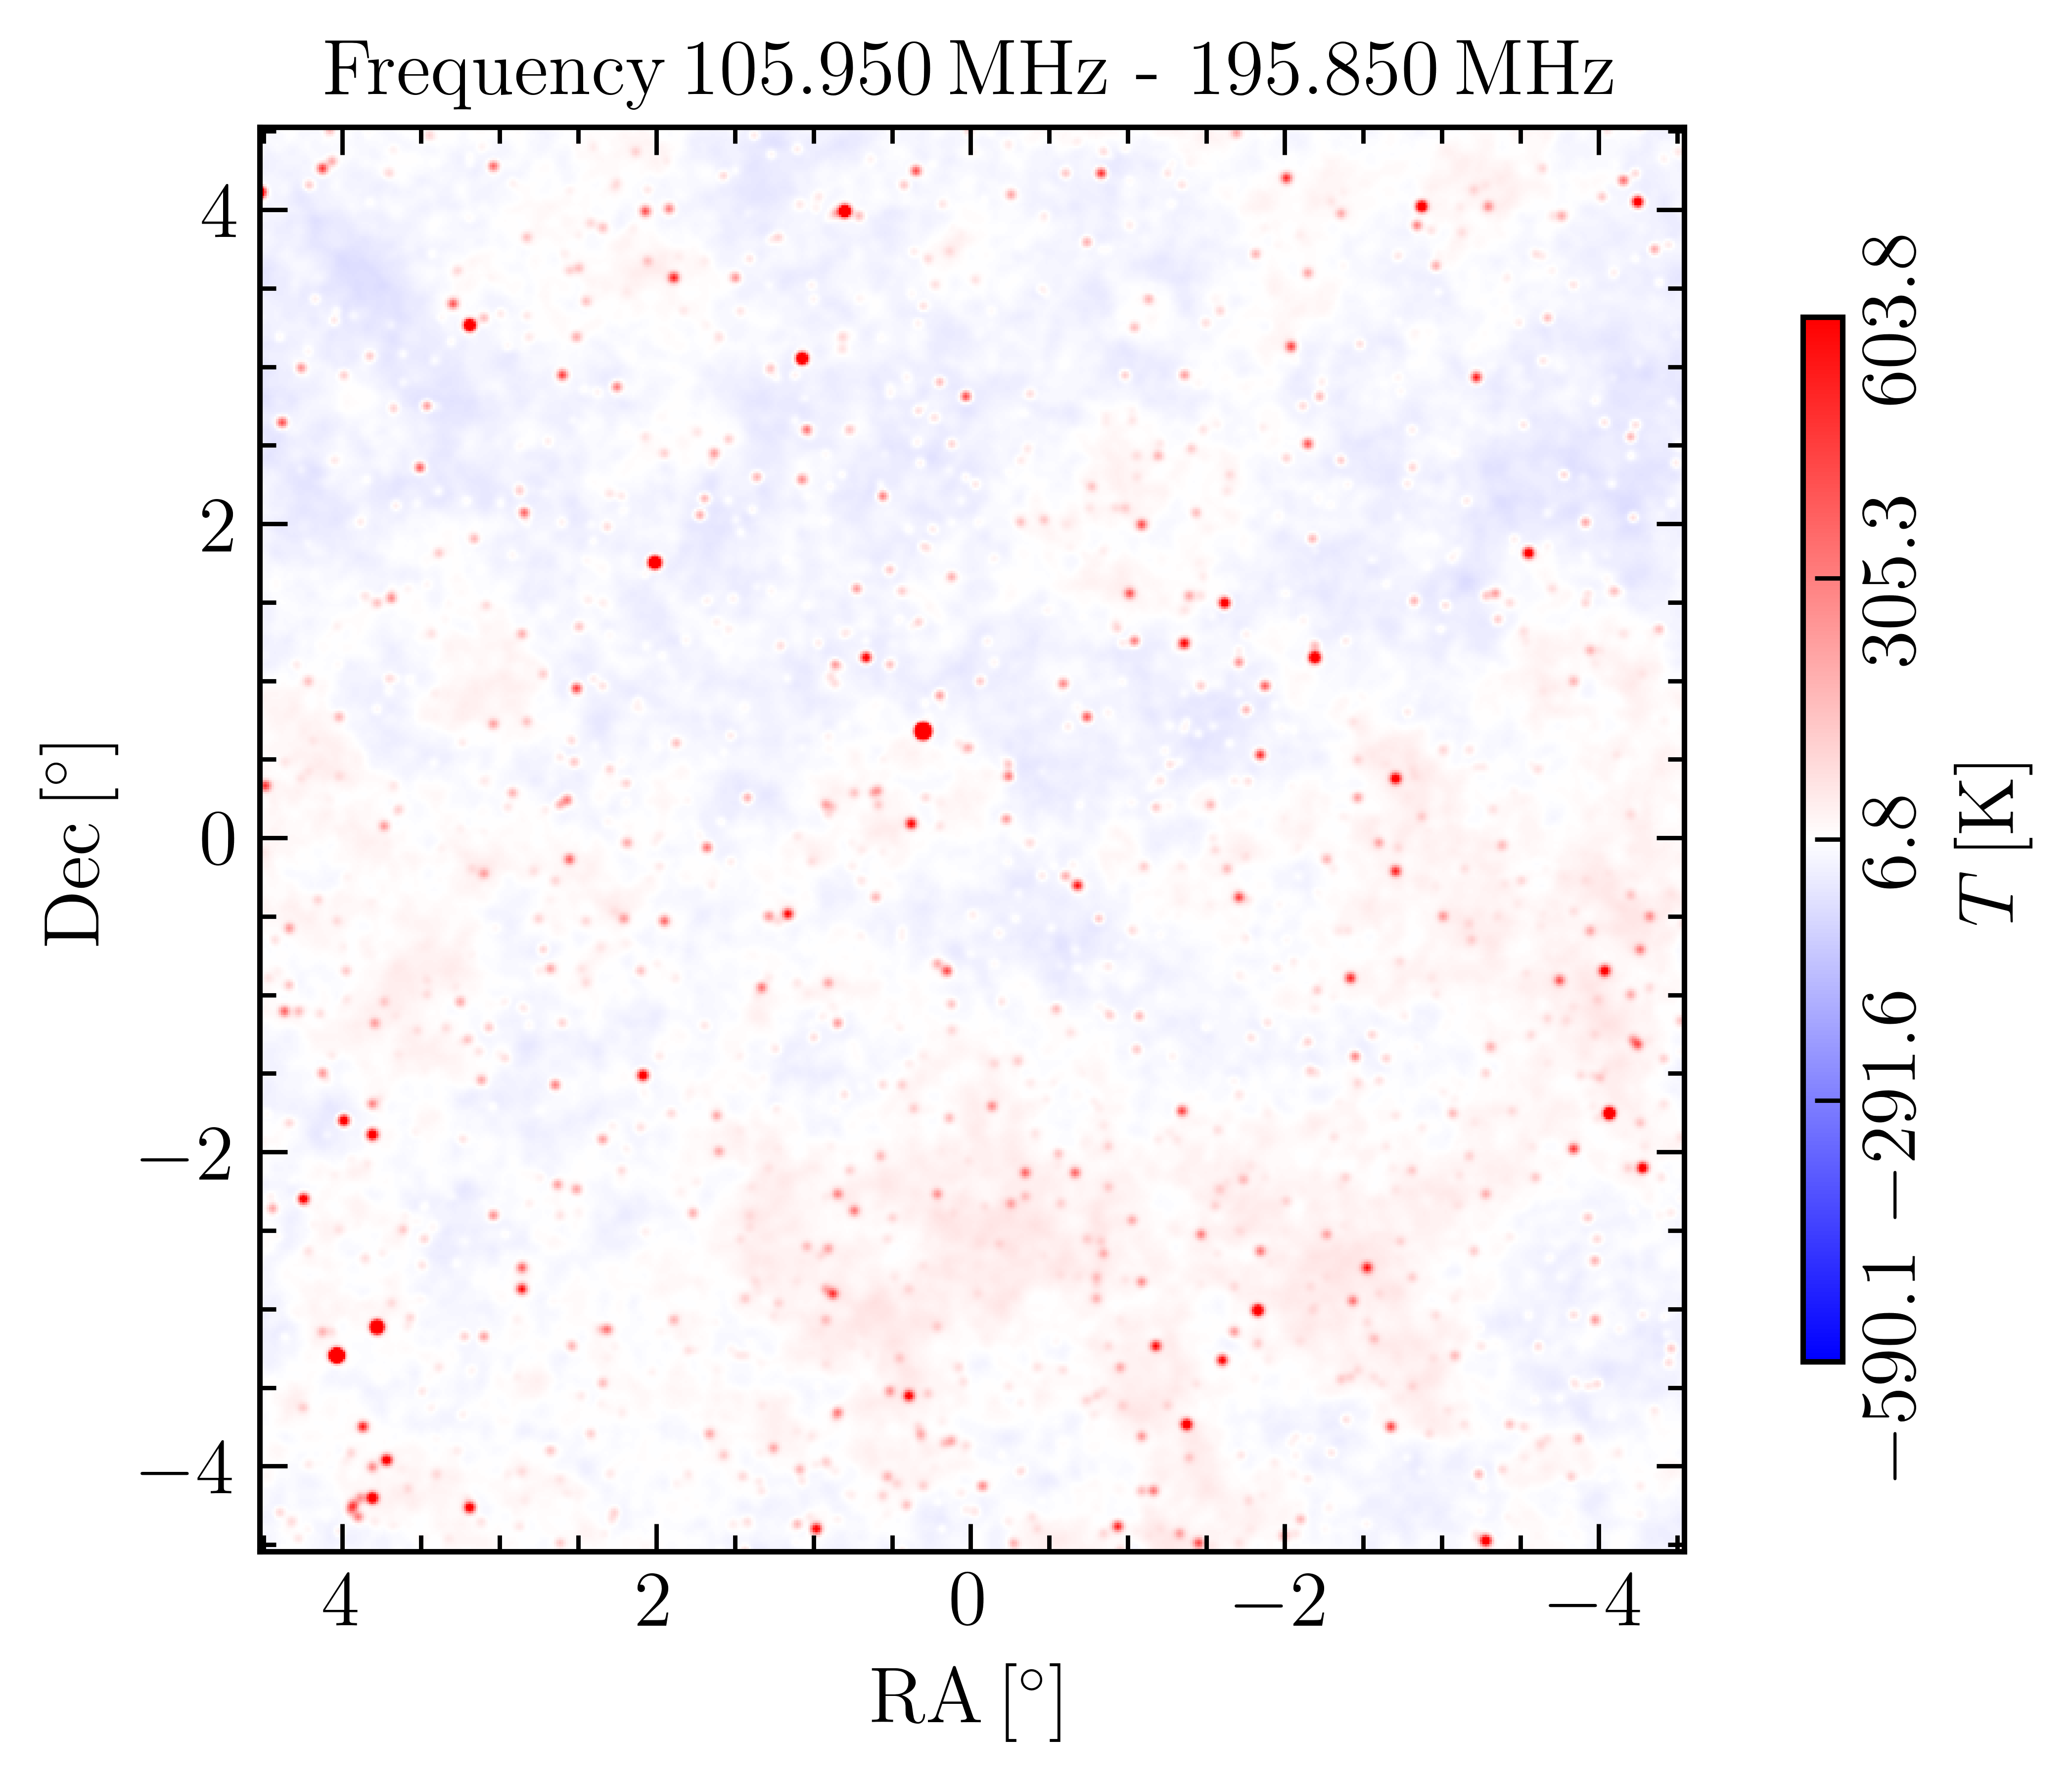

In [11]:
imap_path = '/home/DATA/ycli/ska_challenge/2023/sim_900_combined/'
imap_name = 'imap00_HI_PS_FG.h5'
pm.show_map(imap_path+imap_name, 'imap', indx=(slice(0, None), ), 
            figsize=(6, 4), sigma=10, unit='K',smoothing_fwhm=0.055)